# Global Power Plant Database

Problem Statement:
    
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing the library

In [254]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [255]:
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df.shape   ## to check how many rows and columns in a data set

(907, 27)

Observation : In this data, there are 907 rows and 27 columns.

In [257]:
df.dtypes    ## it will show the datatypes of the columns

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [258]:
# In this data set there are some categorical featurs and some are numerical features.

In [259]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [260]:
df.info()   ## it will give the information about dataset like is there any null values or not in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [261]:
df.country.value_counts()

IND    907
Name: country, dtype: int64

In [262]:
df.country.value_counts()


IND    907
Name: country, dtype: int64

In [263]:
df.country_long.value_counts()


India    907
Name: country_long, dtype: int64

In [264]:
df.name.value_counts()


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [265]:
df.gppd_idnr.value_counts()


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [266]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

# Checking for null values

In [267]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [268]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

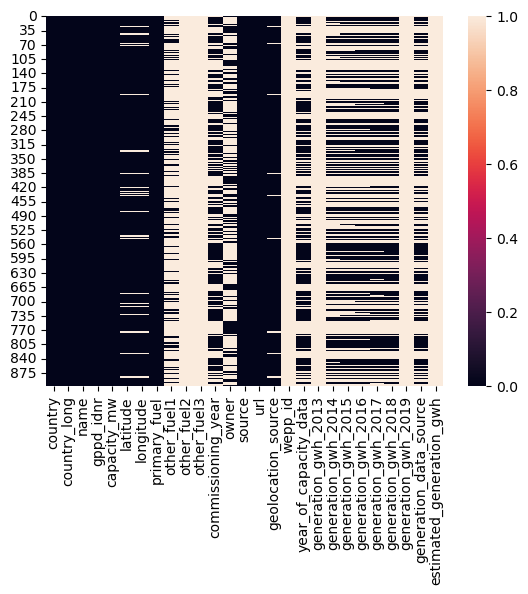

In [269]:
sns.heatmap(df.isnull())

# Filling missing values 

In [270]:
df.other_fuel1 .value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [271]:
df.other_fuel2 .value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [272]:
df.other_fuel3 .value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [273]:
# there are no any values in some attributes so it can be dropped out.

In [274]:
cols=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']

In [275]:
df = df.drop(columns=cols, axis=1)

In [276]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
## filling the missing values for numerical values by mean

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [278]:
# filling the missing values for categorical values by mode
df['owner'] = df["owner"].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df["geolocation_source"].fillna(df['geolocation_source'].mode()[0])
df['generation_data_source'] = df["generation_data_source"].fillna(df['generation_data_source'].mode()[0])

In [279]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

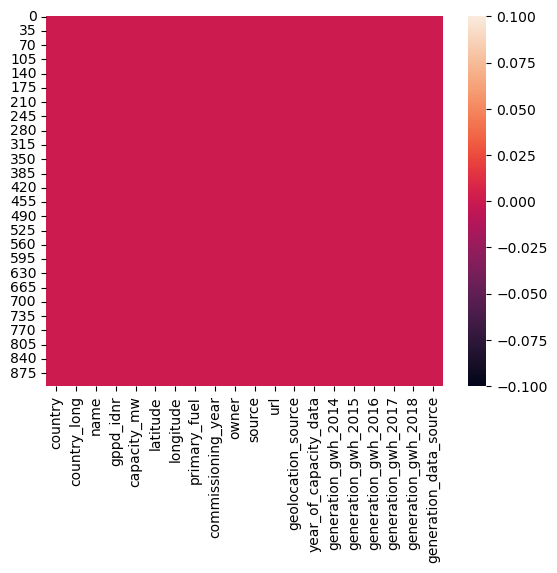

In [280]:
sns.heatmap(df.isnull())

In [281]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# EDA

<AxesSubplot:ylabel='Frequency'>

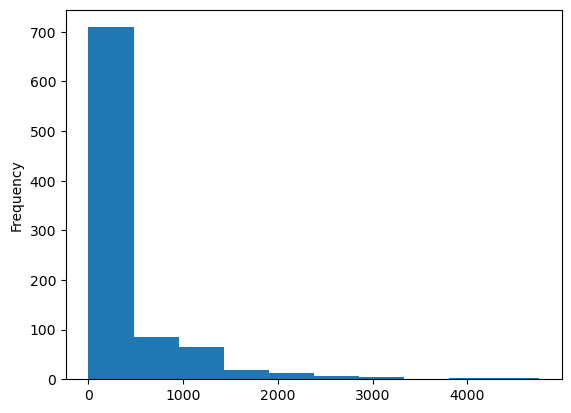

In [282]:
df['capacity_mw'].plot.hist()

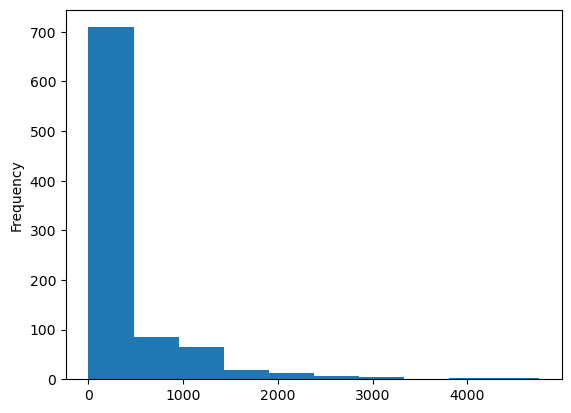

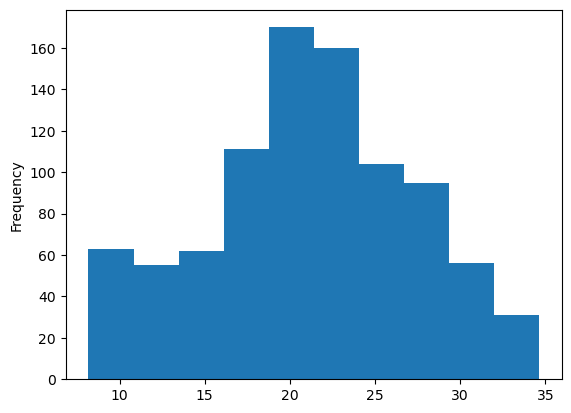

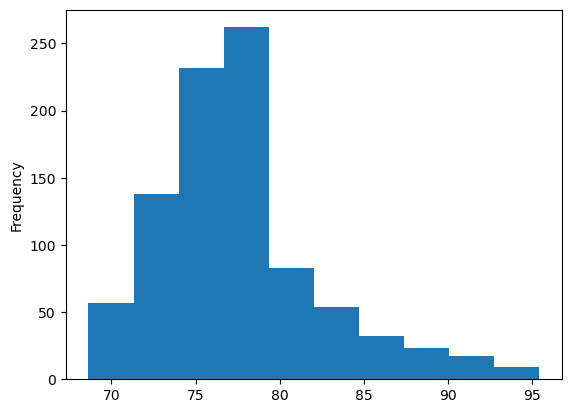

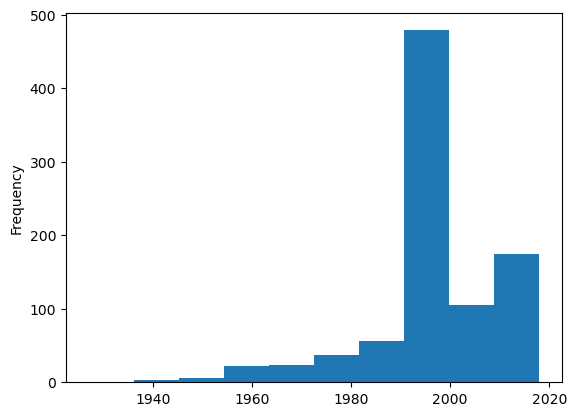

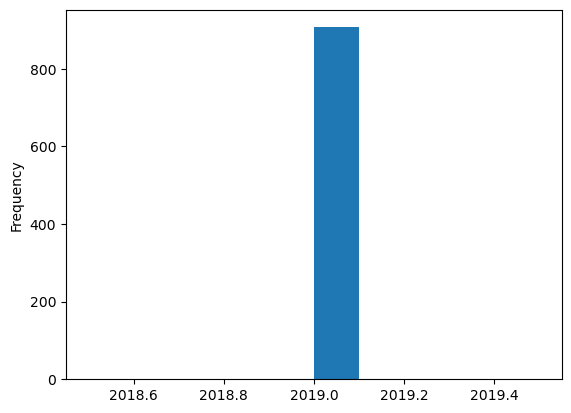

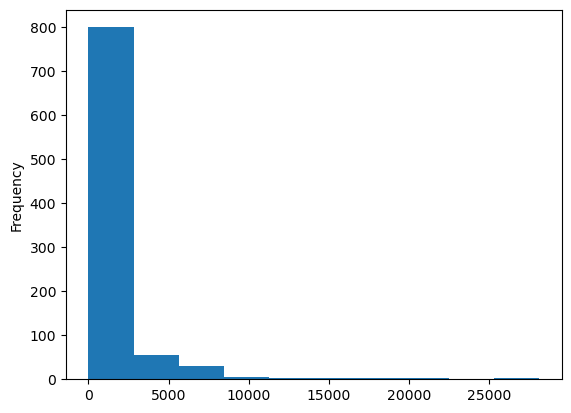

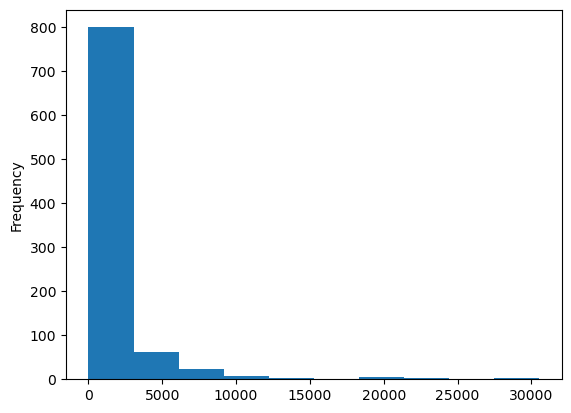

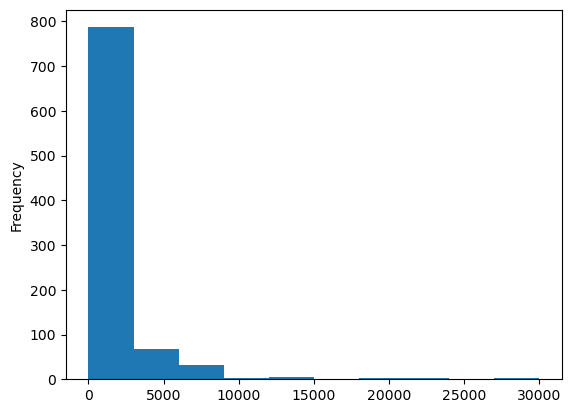

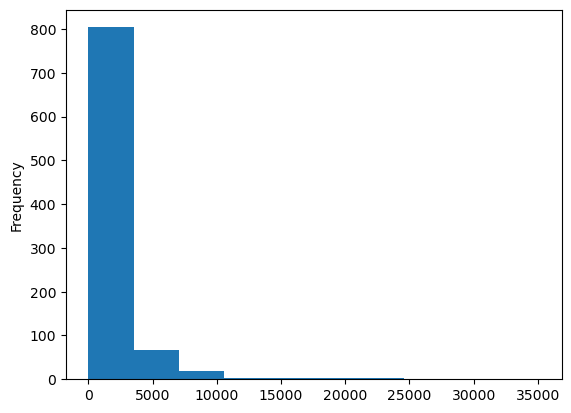

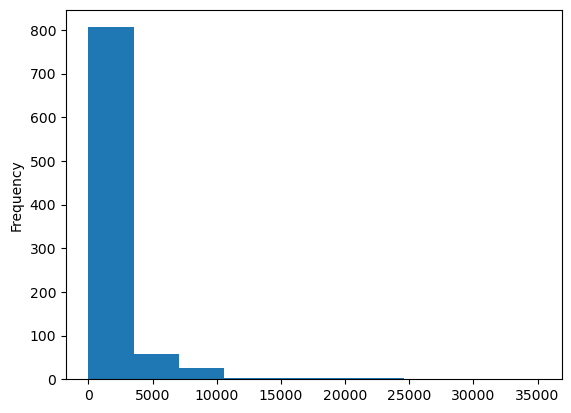

In [283]:
for i in df.describe().columns:
    df[i].plot.hist()
    plt.show()

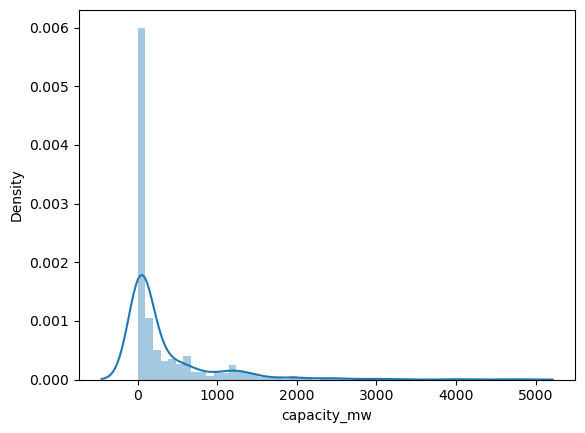

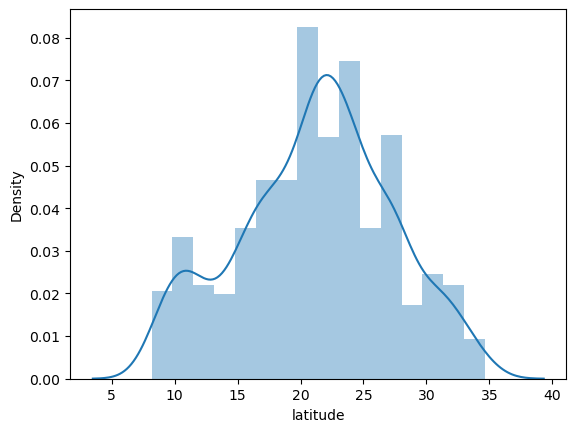

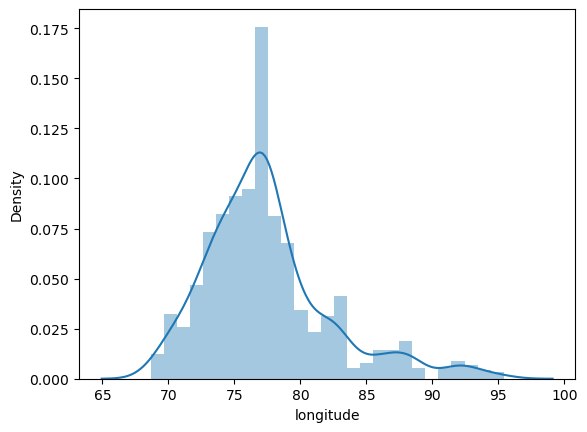

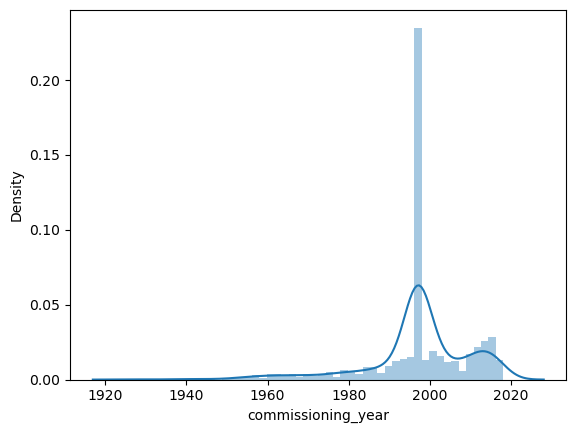

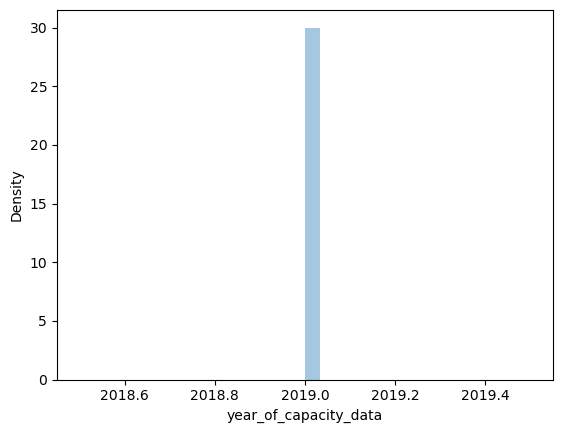

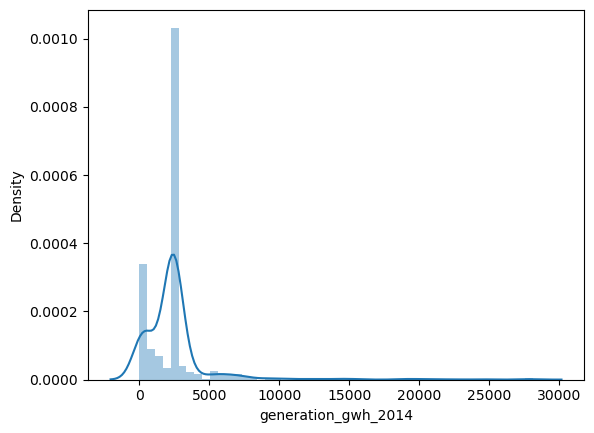

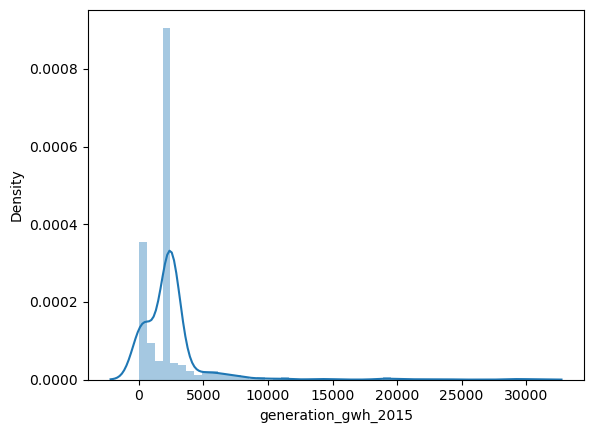

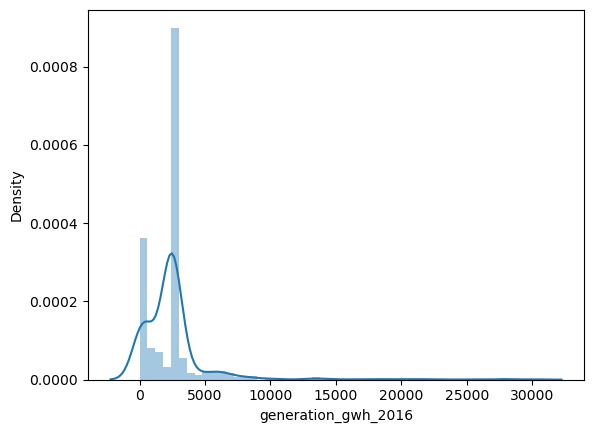

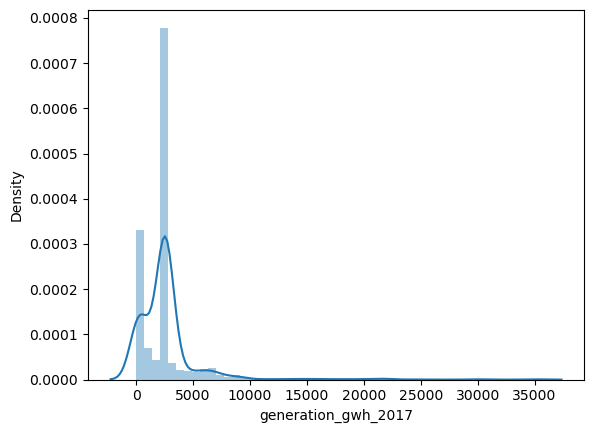

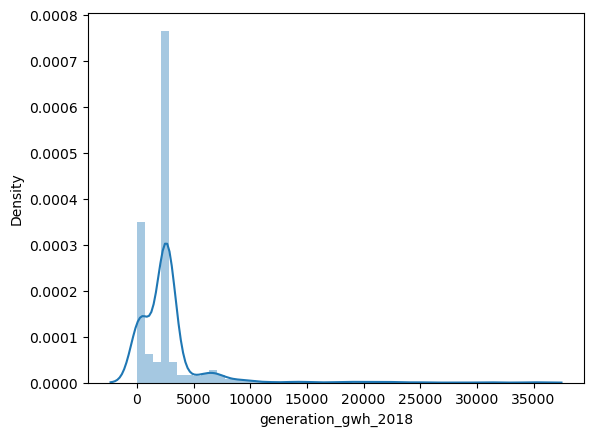

In [284]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

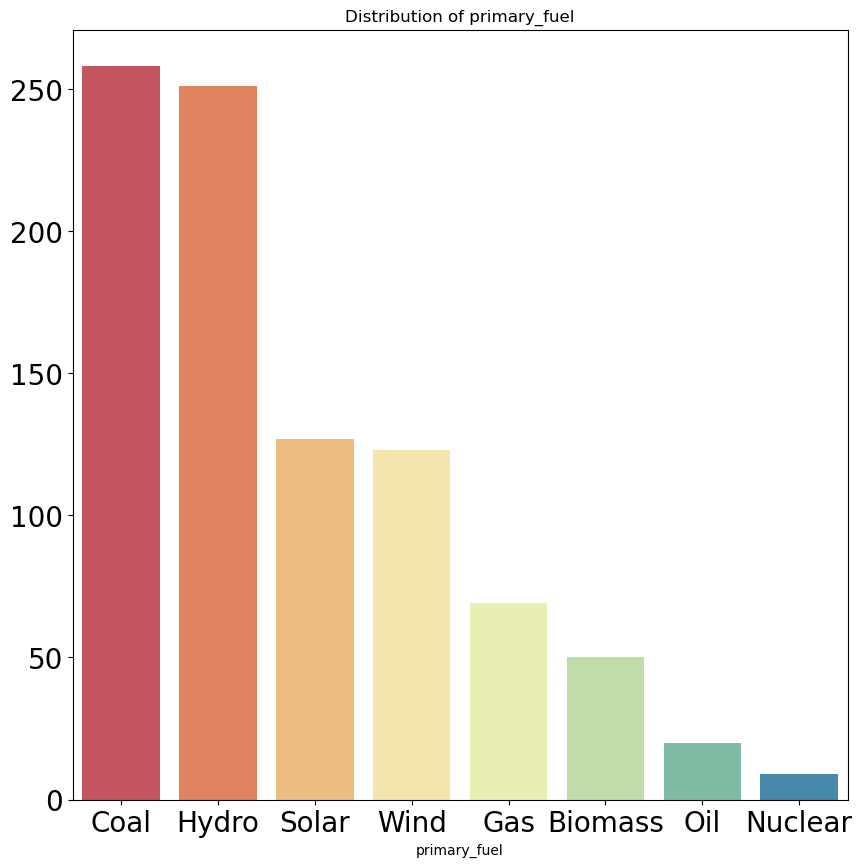

In [285]:
# Creating a barplot for 'Income'
primary_fuel = df['primary_fuel'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(primary_fuel.index, primary_fuel.values, palette='Spectral')
plt.title('Distribution of primary_fuel')
plt.xlabel('primary_fuel')
plt.tick_params(labelsize=20)
plt.show()

Observation : Coal and hydro is widely used to generate electricity.

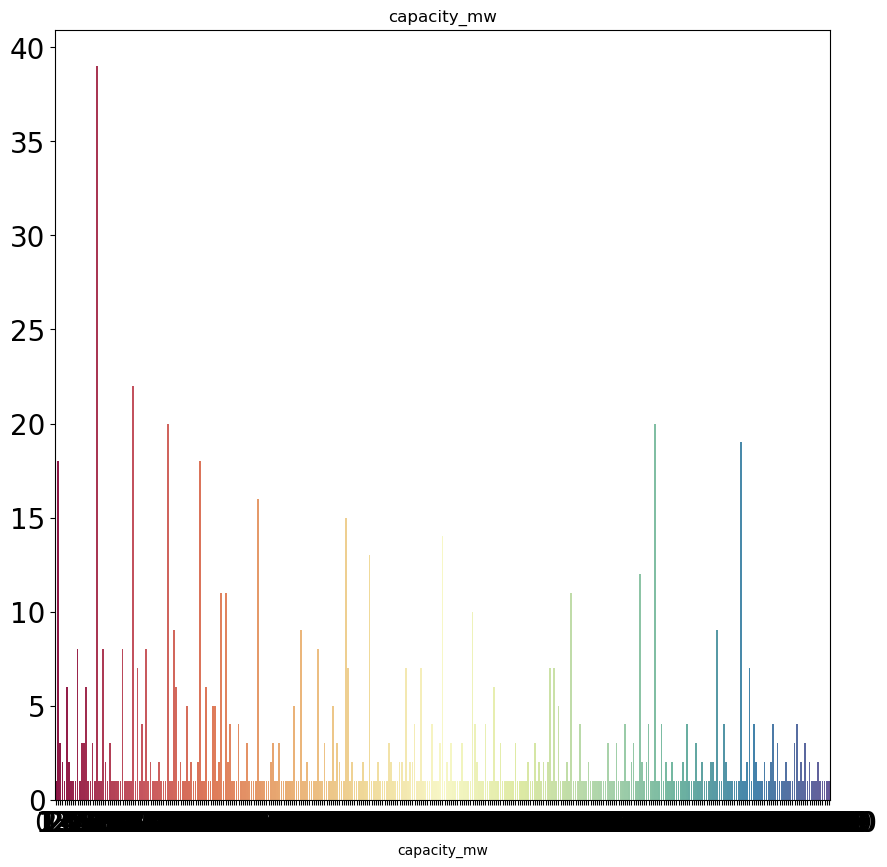

In [286]:
# Creating a barplot for 'capacity_mw'
capacity_mw = df['capacity_mw'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(capacity_mw.index, capacity_mw.values, palette='Spectral')
plt.title('capacity_mw')
plt.xlabel('capacity_mw')
plt.tick_params(labelsize=20)
plt.show()

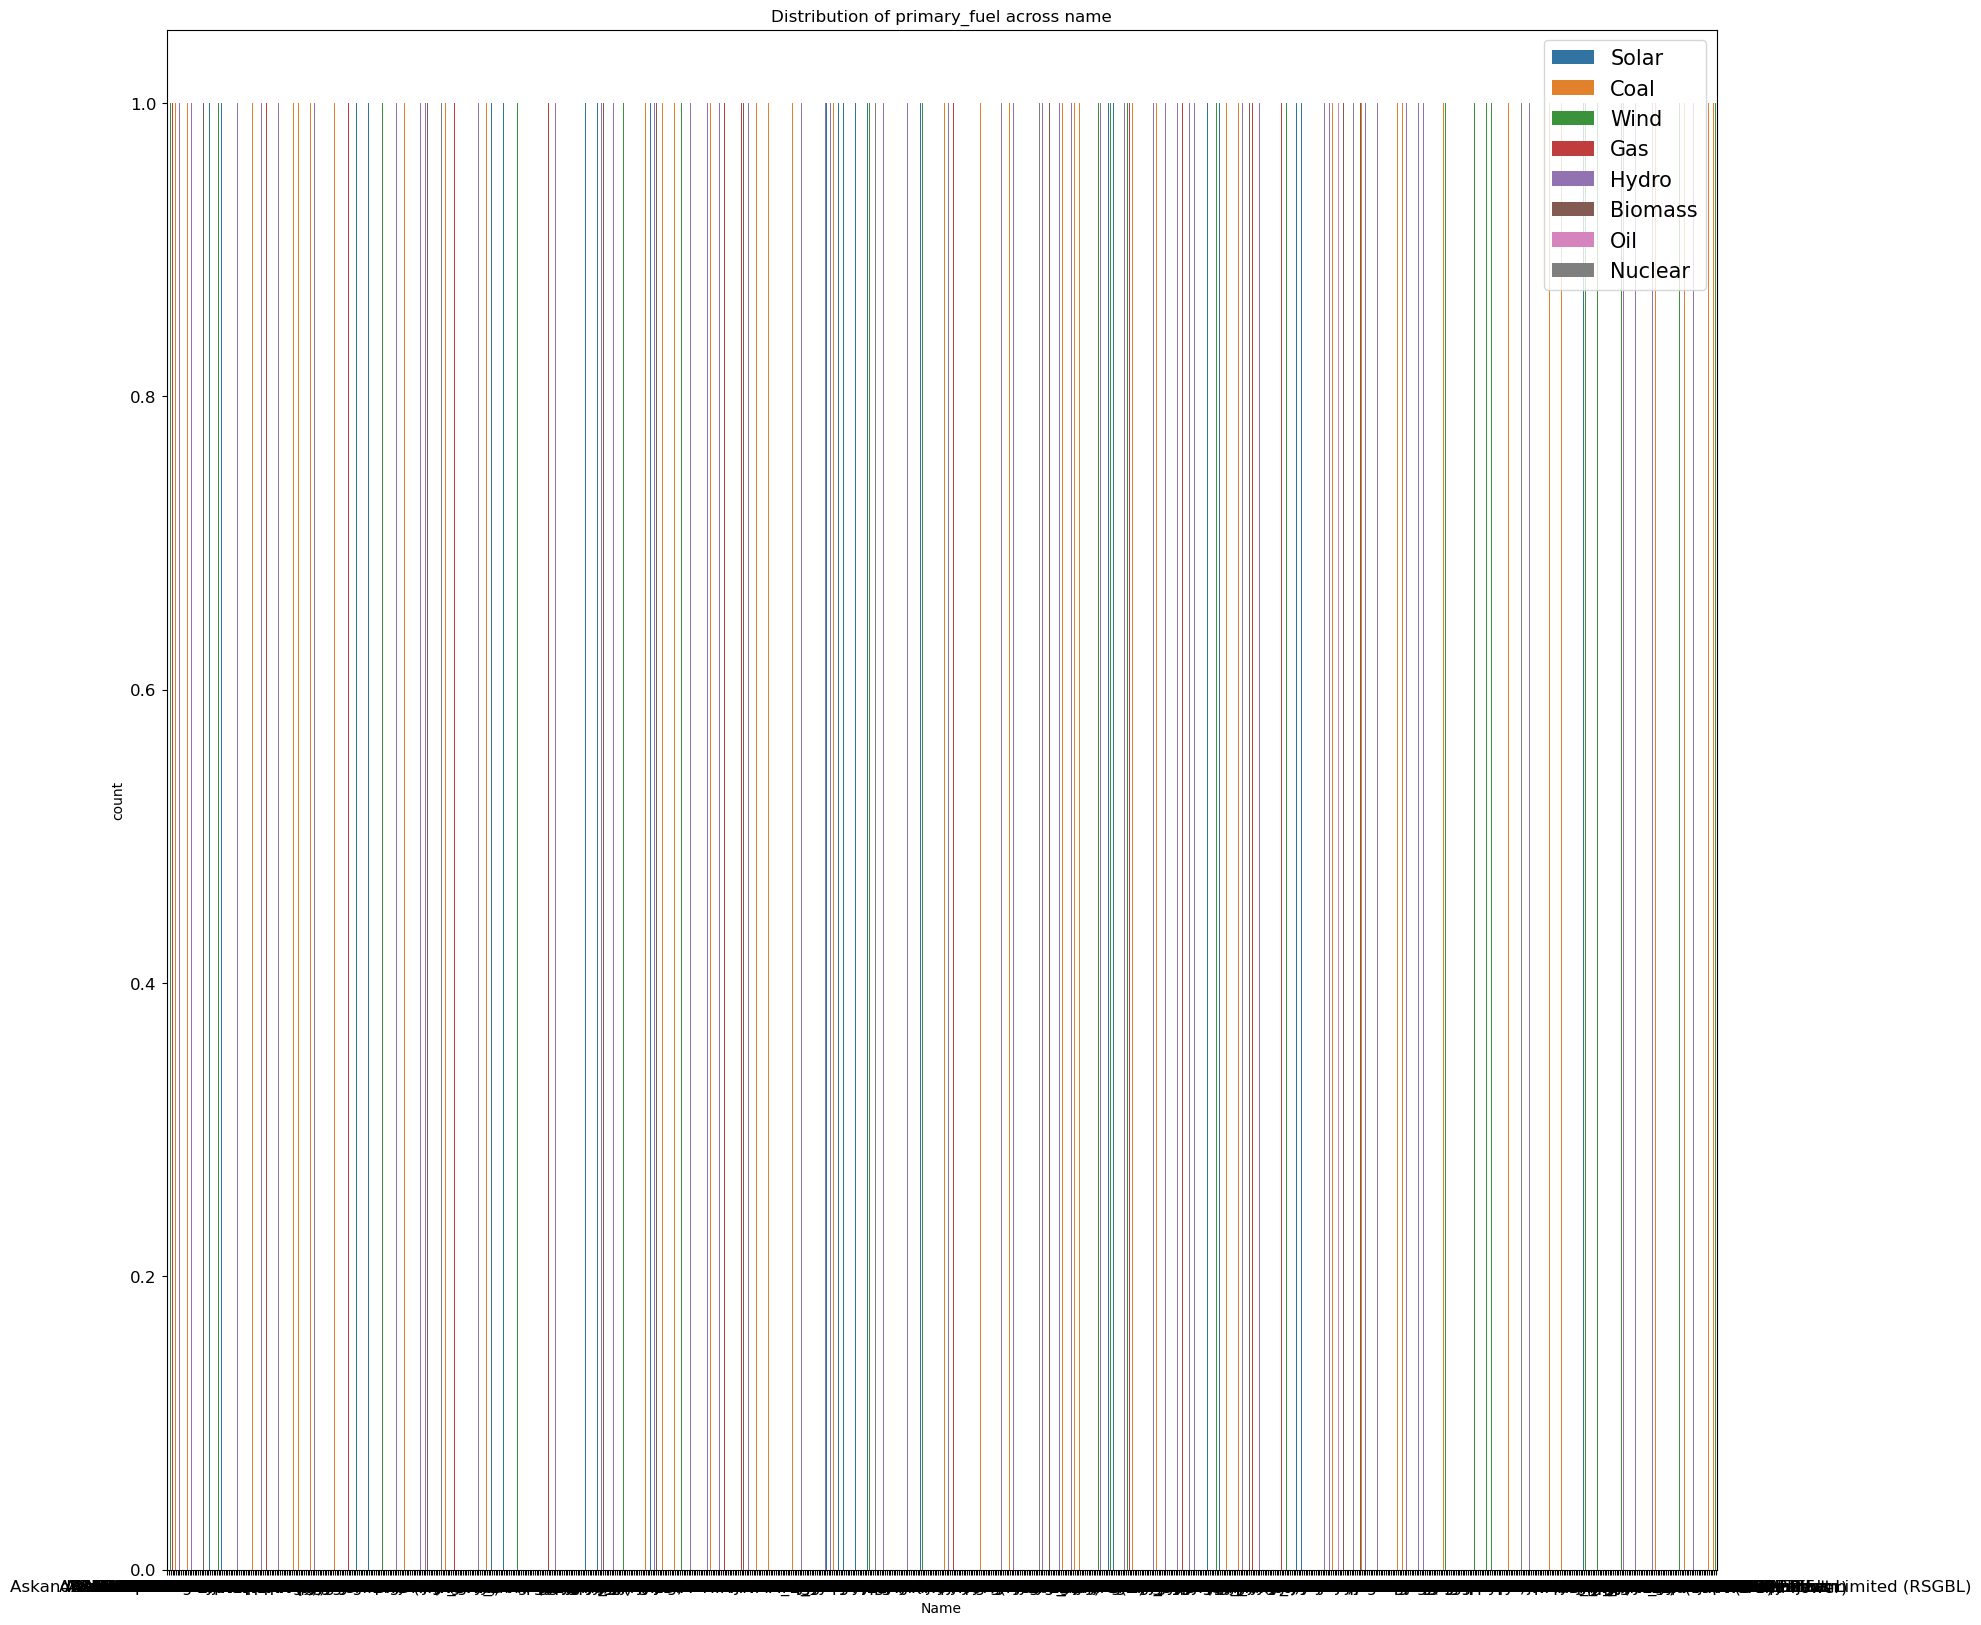

In [287]:
# Creating a countplot of primary fuel across name
plt.style.use('default')
plt.figure(figsize=(20, 20))
sns.countplot(df['name'], hue=df['primary_fuel'])
plt.title('Distribution of primary_fuel across name')
plt.xlabel('Name')

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

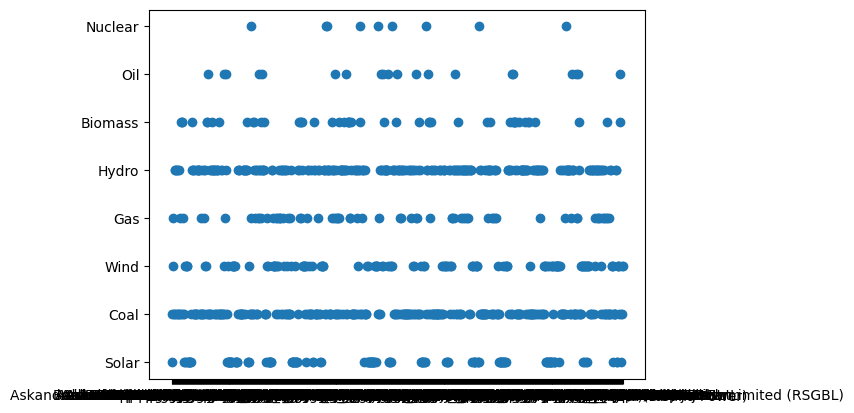

In [288]:
plt.scatter(df['name'],df['primary_fuel'])

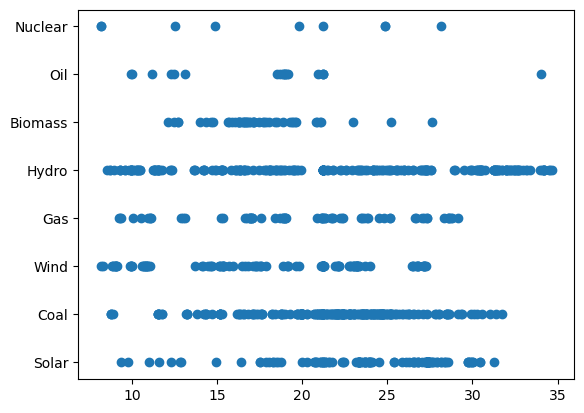

In [289]:
plt.scatter(df['latitude'],df['primary_fuel'])

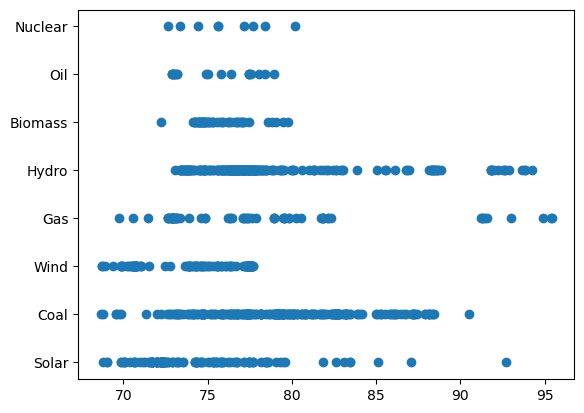

In [290]:
plt.scatter(df['longitude'],df['primary_fuel'])

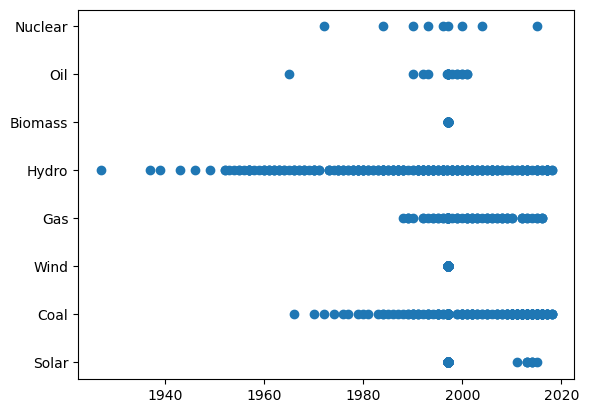

In [291]:
plt.scatter(df['commissioning_year'],df['primary_fuel'])

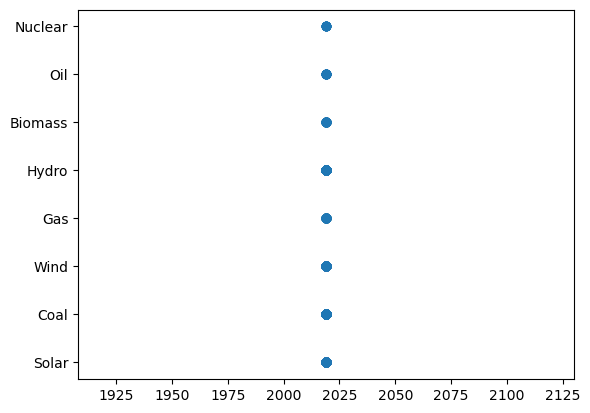

In [292]:
plt.scatter(df['year_of_capacity_data'],df['primary_fuel'])

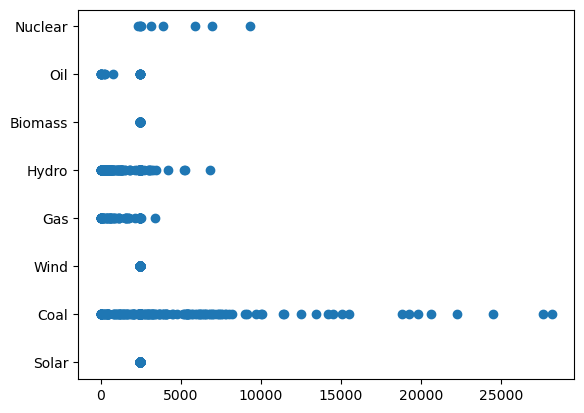

In [293]:
plt.scatter(df['generation_gwh_2014'],df['primary_fuel'])

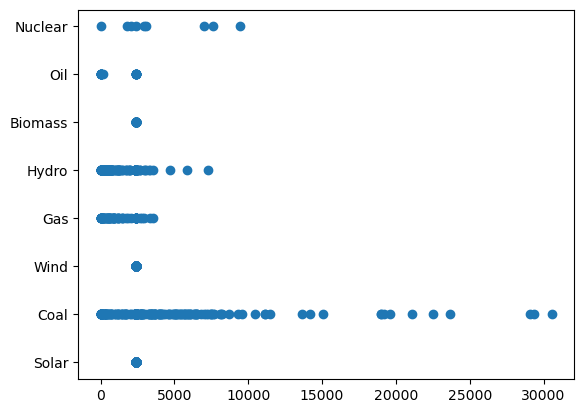

In [294]:
plt.scatter(df['generation_gwh_2015'],df['primary_fuel'])

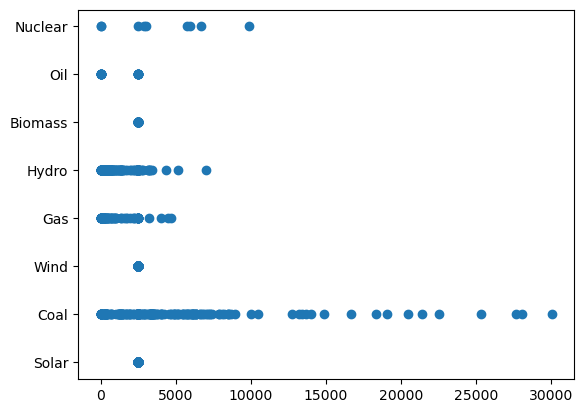

In [295]:
plt.scatter(df['generation_gwh_2016'],df['primary_fuel'])

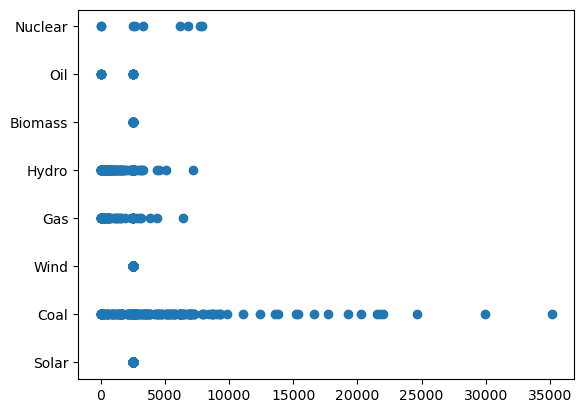

In [296]:
plt.scatter(df['generation_gwh_2017'],df['primary_fuel'])

# Label Encoding

In [297]:
from sklearn.preprocessing import LabelEncoder
cols = ['country','country_long','name','gppd_idnr','primary_fuel','owner','source','url','geolocation_source','generation_data_source']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [298]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,0,1,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,0,2,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


# Boxplot to check outliers

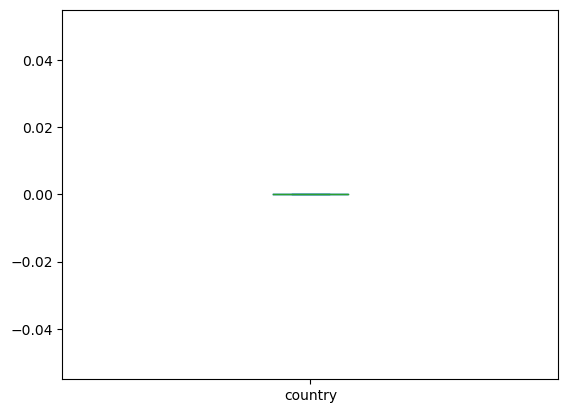

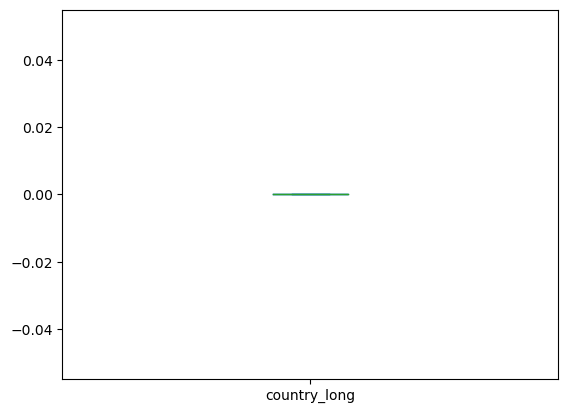

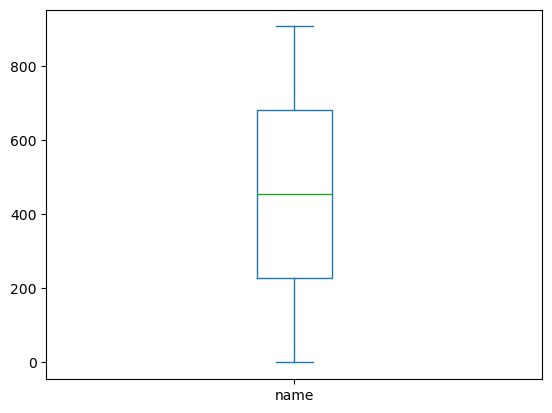

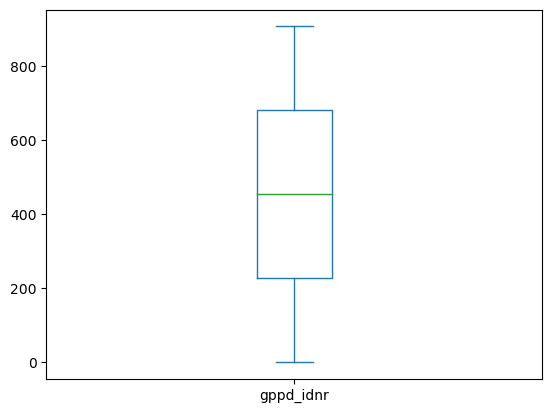

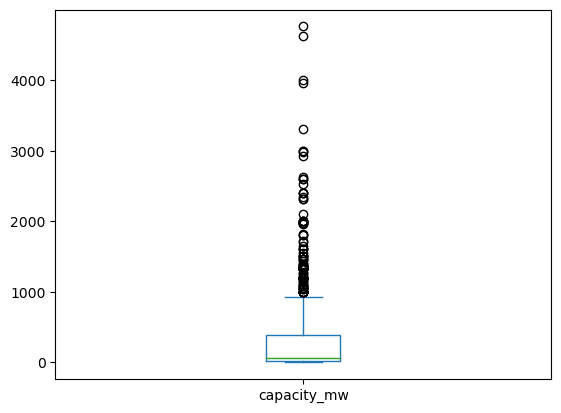

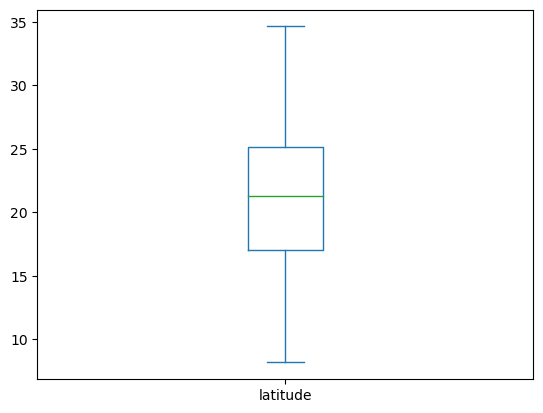

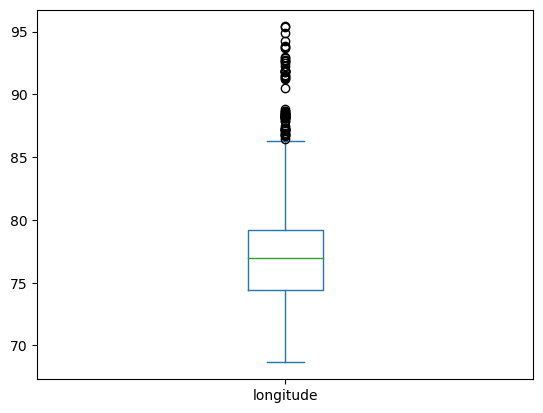

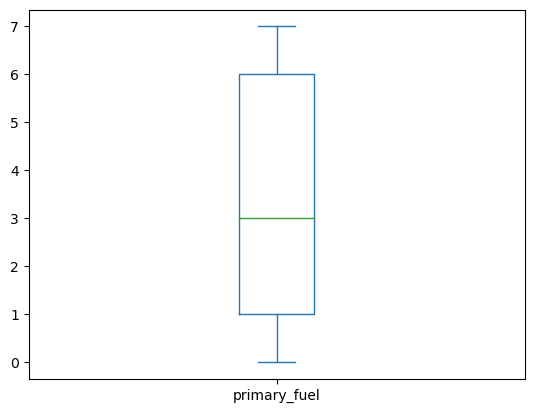

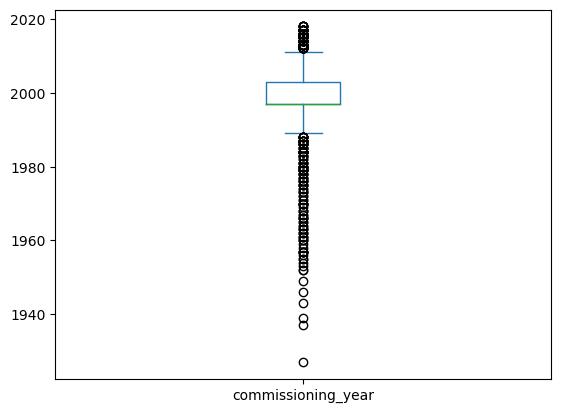

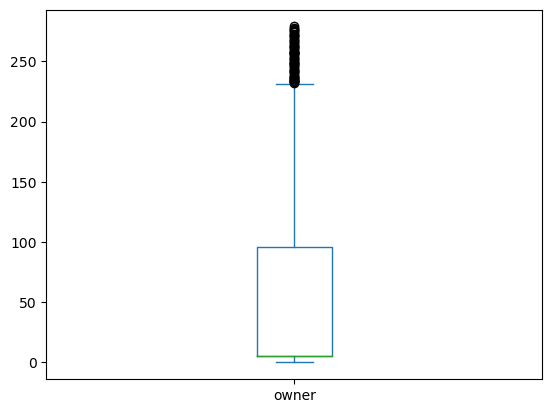

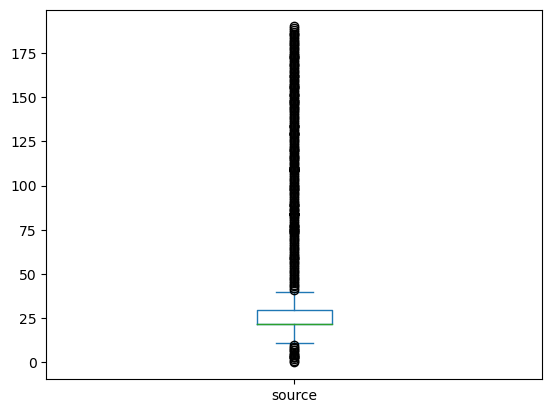

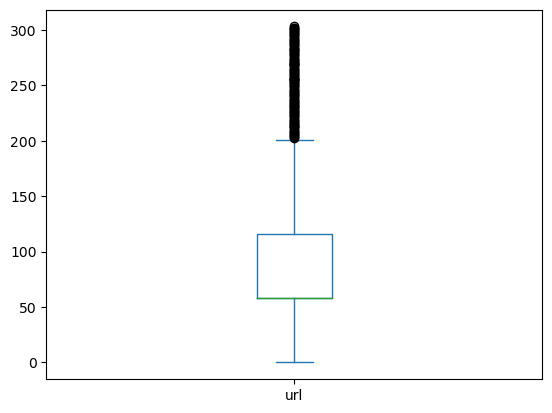

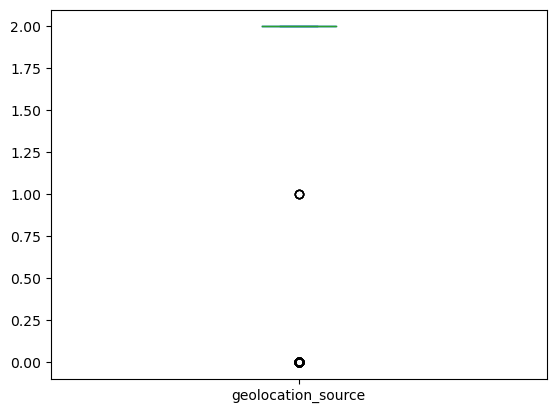

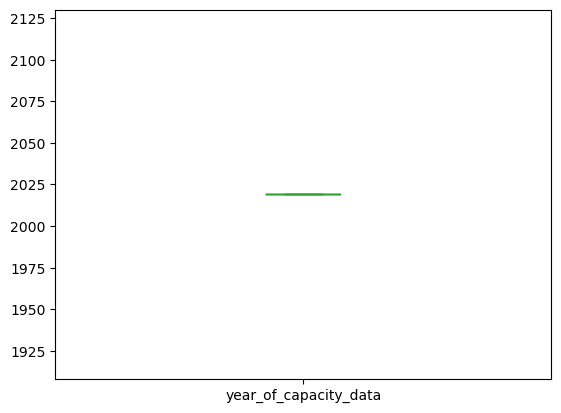

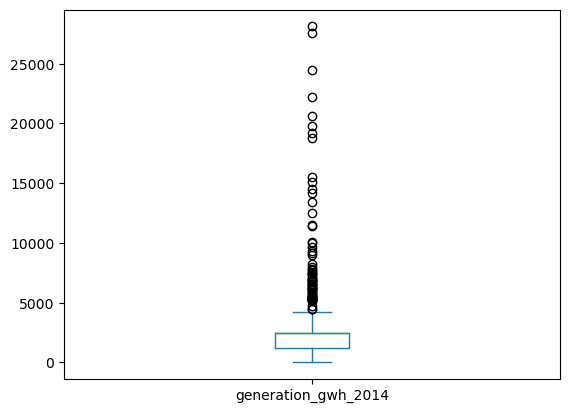

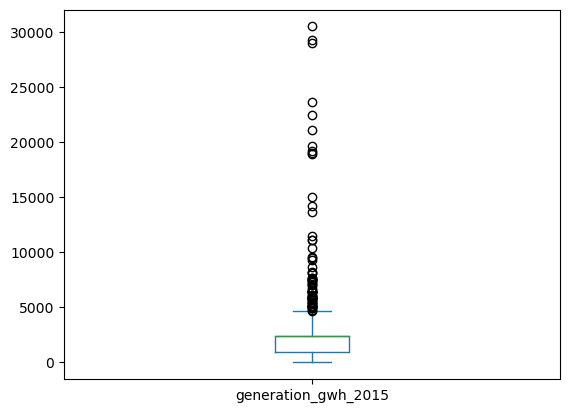

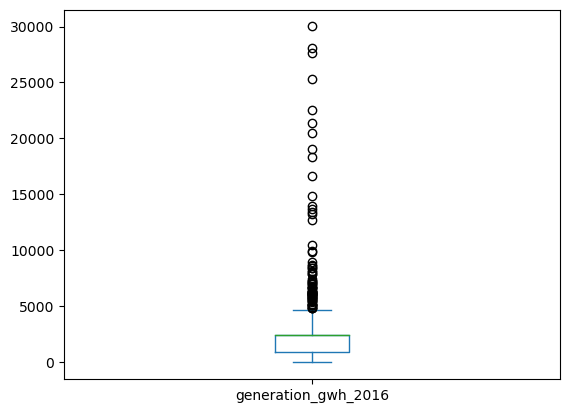

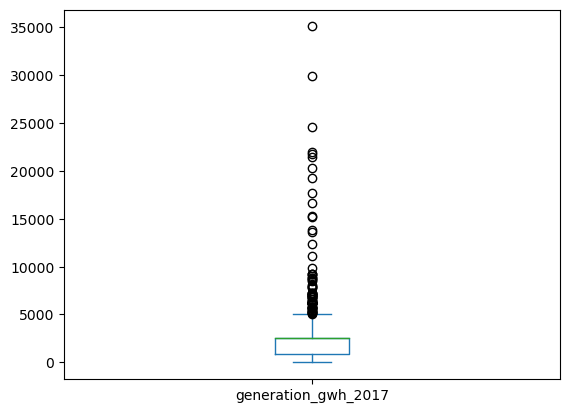

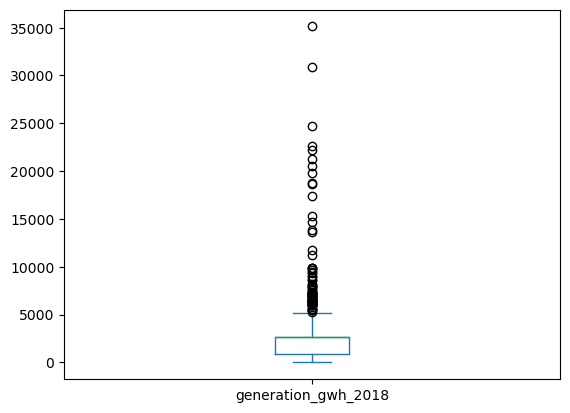

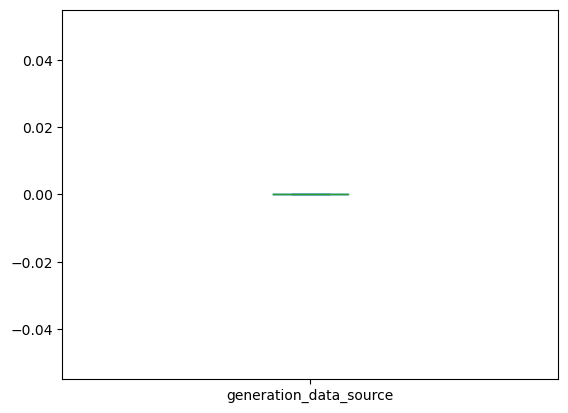

In [299]:
for i in df.describe().columns:
    df[i].plot.box()
    plt.show()

In [300]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,0,1,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,0,2,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [301]:
cols=['country','country_long','name','generation_data_source','year_of_capacity_data']

In [302]:
df = df.drop(columns=cols, axis=1)

In [303]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Removing outliers

In [304]:
import numpy as np

In [305]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.779137,0.548908,1.149805,0.878280,1.225688,1.069162e+00,2.095328,1.460215,0.476673,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.252074,0.386977,0.587311,0.593788,0.967877,1.747794e-14,2.446913,2.917019,1.116401,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.527719,0.486679,0.116179,1.682394,1.664401,1.747794e-14,0.656734,0.512075,1.571318,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,1.730142,0.324240,0.439989,2.889052,0.529164,5.310801e-01,0.620363,0.489662,0.518459,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.726323,2.498942,0.125479,1.027976,0.967877,1.376637e+00,0.620363,0.489662,0.518459,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.145133,2.159821,0.806975,0.022477,0.967877,1.453505e+00,0.620363,0.489662,0.518459,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,1.409321,0.548060,1.366853,0.145644,1.225688,1.747794e-14,0.701112,0.743019,1.030242,2.560940,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,1.672853,0.509909,0.974707,0.391673,1.664401,1.747794e-14,0.620363,0.512075,2.353208,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.328460,0.417498,0.518793,0.772866,0.967877,1.747794e-14,0.422268,0.339596,0.177271,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [306]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
       621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
       808, 808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880, 880,
       880, 880, 880, 880, 895, 900], dtype=int64), array([ 1, 11, 12, 13, 14,  7,  7,  1, 10, 11, 12, 13, 14,  1, 10,  3,  3,
        7,  1, 10, 11, 12, 13, 14,  5,  3,  7,  1, 10, 11, 12, 13, 14,  7,
     

In [307]:
df1=df[(z<3).all(axis=1)]
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2016.000000,5,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,1997.091082,5,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# checking Correlation 

In [308]:
dfcor=df.corr() 

In [309]:
dfcor

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
gppd_idnr,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.044059,6.305894e-01,4.163838e-01,5.970803e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02
capacity_mw,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.274292,-3.110481e-01,-2.421218e-01,-2.438304e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.102069,-7.118234e-02,5.592656e-02,-1.310376e-01,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.092331,-3.012853e-01,-2.393334e-01,-3.029847e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,0.609180,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,2.842958e-01,5.361263e-02,5.898861e-01,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,0.044059,0.274292,0.102069,0.092331,-0.126650,1.000000,1.507424e-02,2.152776e-02,1.091016e-02,-7.843657e-03,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01
owner,0.630589,-0.311048,-0.071182,-0.301285,0.284296,0.015074,1.000000e+00,7.695825e-01,4.197726e-01,-3.848377e-01,1.211927e-18,-4.253175e-17,-8.115062e-18,-7.069909e-17,4.713271e-17
source,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.021528,7.695825e-01,1.000000e+00,1.601444e-01,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
url,0.597080,-0.243830,-0.131038,-0.302985,0.589886,0.010910,4.197726e-01,1.601444e-01,1.000000e+00,-1.892914e-02,3.902318e-17,-9.717344e-18,-5.344670e-17,-9.633418e-17,8.734433e-18
geolocation_source,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-3.848377e-01,-5.057202e-01,-1.892914e-02,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17


<AxesSubplot:>

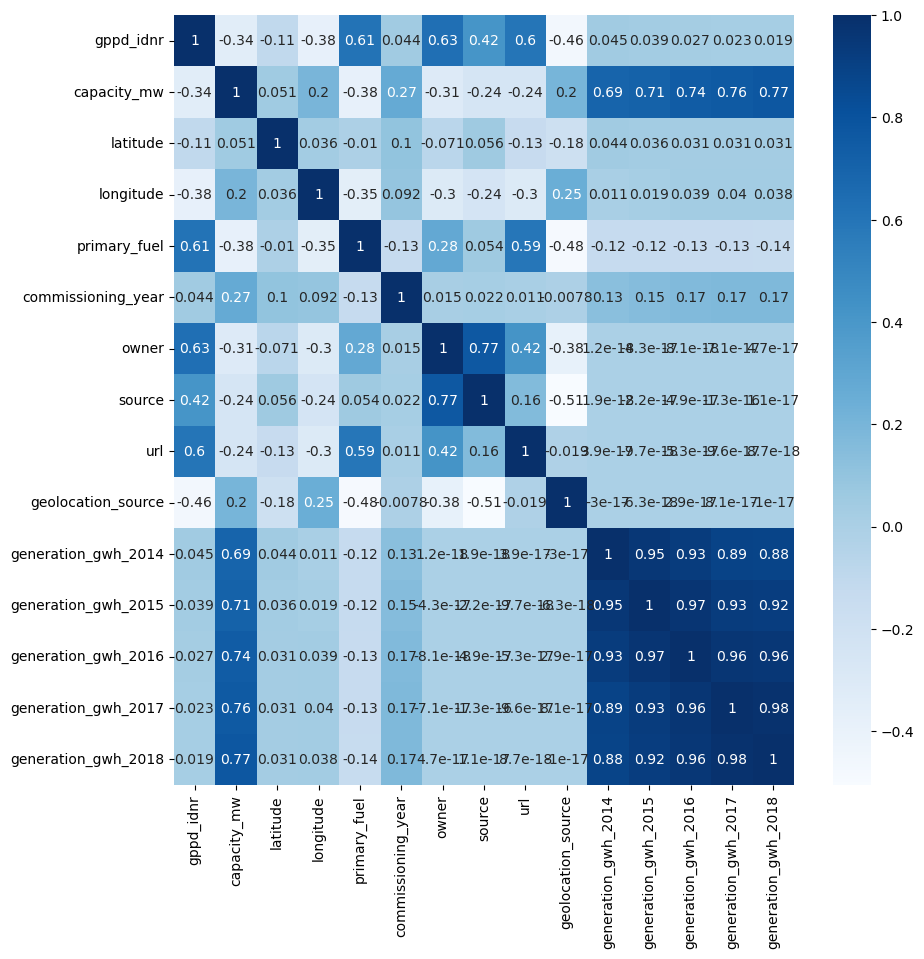

In [310]:
plt.figure(figsize=(10,10))           ### figsize=(10,10)   length,breadth
sns.heatmap(dfcor,cmap='Blues',annot=True)   ## cmap='Blues'  it will represent in blue color & annot=True means it will represent the correlated value in plot.

# Train_Test_Split 

In [311]:
# specify input and output attributes
X = df1.drop(columns=['primary_fuel'], axis=1)
Y = df1['primary_fuel']

In [312]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Best Random state

In [313]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.6586826347305389 random_state 1
accuracy 0.7065868263473054 random_state 2
accuracy 0.6766467065868264 random_state 3
accuracy 0.7245508982035929 random_state 4
accuracy 0.7245508982035929 random_state 5
accuracy 0.7485029940119761 random_state 6
accuracy 0.7365269461077845 random_state 7
accuracy 0.7005988023952096 random_state 8
accuracy 0.7365269461077845 random_state 9
accuracy 0.7305389221556886 random_state 10
accuracy 0.718562874251497 random_state 11
accuracy 0.7125748502994012 random_state 12
accuracy 0.6646706586826348 random_state 13
accuracy 0.7065868263473054 random_state 14
accuracy 0.6526946107784432 random_state 15
accuracy 0.6646706586826348 random_state 16
accuracy 0.7245508982035929 random_state 17
accuracy 0.7245508982035929 random_state 18
accuracy 0.7245508982035929 random_state 19
accuracy 0.7005988023952096 random_state 20
accuracy 0.7065868263473054 random_state 21
accuracy 0.718562874251497 random_state 22
accuracy 0.7245508982035929 random_state 23

In [314]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8083832335329342  on Random_state 75


In [315]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=75)

# ML Model

In [ ]:
# from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


# Cross validation

In [317]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=7)
scr2=cross_val_score(dt,X,Y,cv=7)
scr3=cross_val_score(rf,X,Y,cv=7)
scr4=cross_val_score(svc,X,Y,cv=7)
scr5=cross_val_score(KN,X,Y,cv=7)
scr6=cross_val_score(GNB,X,Y,cv=7)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.7194077631052421
Cross Validation score of Decision Tree Classifier :  0.7962084833933574
Cross Validation score of Random Forest Classifier :  0.8621948779511802
Cross Validation score of SVC :  0.46048419367747107
Cross Validation score of KNeighbors classifier :  0.7661964785914366
Cross Validation score of GaussianNB :  0.7661964785914366


# Hyperparameter Tunning with GridSearchCV

In [318]:
RandomForestClassifier()

RandomForestClassifier()

In [319]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[15,16,17,18,19],
            'criterion':['gini','entropy']}

In [ ]:
# GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

In [321]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [322]:
GCV.best_estimator_

RandomForestClassifier(max_depth=18, max_features='auto')

In [323]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8802395209580839

# Conclusion : RandomForestClassifer and LogisticRegression is the best model for this dataset.

In [324]:
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,16.2949,77.3568,1,2016.000000,5,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,12.8932,78.1654,6,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,15.2758,75.5811,7,1997.091082,5,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,24.3500,73.7477,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Prediction for capacity_mw Linear Regression 

In [328]:
# specify input and output attributes
x = df1.drop(columns=['capacity_mw'], axis=1)
y = df1['capacity_mw']

In [329]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [330]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.6200449531418101
At random state 0,the testing accuracy is :- 0.5388038078880762


At random state 1,the training accuracy is :- 0.5748798147386162
At random state 1,the testing accuracy is :- 0.6563069497407584


At random state 2,the training accuracy is :- 0.585285423002462
At random state 2,the testing accuracy is :- 0.6358291707942321


At random state 3,the training accuracy is :- 0.6561936570059234
At random state 3,the testing accuracy is :- 0.46055151820157036


At random state 4,the training accuracy is :- 0.6012148564685555
At random state 4,the testing accuracy is :- 0.585860499378084


At random state 5,the training accuracy is :- 0.6190302085680905
At random state 5,the testing accuracy is :- 0.5304197362874419


At random state 6,the training accuracy is :- 0.6314875673000935
At random state 6,the testing accuracy is :- 0.4700263105334048


At random state 7,the training accuracy is :- 0.6470306695381141
At random state 7,t

In [331]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=76)

In [332]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [333]:
lr.fit(x_train,y_train)

LinearRegression()

In [334]:
pred_test=lr.predict(x_test)

In [335]:
print(r2_score(y_test,pred_test))

0.6905159503624436


# Hyperparameter Tunning

In [336]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [337]:
from sklearn.linear_model import Lasso

parameters = {'alpha' : [.0001,.001,.01,.1,1,10],'random_state' : list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [339]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.6722426308431014

# Saving the model in pickle format

In [341]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"database_IND.pkl")

['database_IND.pkl']